# Spacy utilities

In [5]:
import spacy

nlp = spacy.load('en')

In [8]:
from Tweet import Tweet, Tweets
all_tweets = Tweets()

In [12]:
import os
dir_path = "./data/"
file_names = os.listdir(dir_path)
all_tweets.load([dir_path + p for p in file_names])

In [14]:
tlist = all_tweets.tweets

In [22]:
sample_tweet = tlist[500]

In [23]:
vars(sample_tweet)

{'date': None,
 'geoloc': None,
 'hashtags': None,
 'id': 966499281187176448,
 'likes': 0,
 'location': 'Uknown',
 'rt_count': 0,
 'seconds_debate': 1559,
 'text': "RT @CAPAction: .@SenBillNelson: AR-15s and AK-47s aren't for hunting. They are for killing. #EndGunViolence #CNNTownHall",
 'timestamp': 'Thu Feb 22 02:25:59 +0000 2018',
 'uid': 176251911}

In [20]:
sample_text = sample_tweet.text

In [21]:
sample_text

'RT @paolamendoza: As a mother I am crying non-stop at #CNNTownHall.\n\nAs an American I am inspired by the courage and strength of the commun…'

In [25]:
doc = nlp(sample_text)

In [39]:
[e for e in enumerate(doc)]

[(0, RT),
 (1, @paolamendoza),
 (2, :),
 (3, As),
 (4, a),
 (5, mother),
 (6, I),
 (7, am),
 (8, crying),
 (9, non),
 (10, -),
 (11, stop),
 (12, at),
 (13, #),
 (14, CNNTownHall),
 (15, .),
 (16, 
  ),
 (17, As),
 (18, an),
 (19, American),
 (20, I),
 (21, am),
 (22, inspired),
 (23, by),
 (24, the),
 (25, courage),
 (26, and),
 (27, strength),
 (28, of),
 (29, the),
 (30, commun),
 (31, …)]

In [71]:
doc[5].similarity(doc[19])

0.39275214

Add attribute of type Spacy.Doc to each tweet

In [82]:
for i,t in enumerate(tlist):
    if i % 1000 == 0:
        print('processing tweet #', i, '({0:.2f}%)'.format(100*i/float(len(tlist))))
    t.doc = nlp(t.text)

processing tweet # 0 (0.00%)
processing tweet # 1000 (2.99%)
processing tweet # 2000 (5.97%)
processing tweet # 3000 (8.96%)
processing tweet # 4000 (11.95%)
processing tweet # 5000 (14.93%)
processing tweet # 6000 (17.92%)
processing tweet # 7000 (20.91%)
processing tweet # 8000 (23.89%)
processing tweet # 9000 (26.88%)
processing tweet # 10000 (29.87%)
processing tweet # 11000 (32.86%)
processing tweet # 12000 (35.84%)
processing tweet # 13000 (38.83%)
processing tweet # 14000 (41.82%)
processing tweet # 15000 (44.80%)
processing tweet # 16000 (47.79%)
processing tweet # 17000 (50.78%)
processing tweet # 18000 (53.76%)
processing tweet # 19000 (56.75%)
processing tweet # 20000 (59.74%)
processing tweet # 21000 (62.72%)
processing tweet # 22000 (65.71%)
processing tweet # 23000 (68.70%)
processing tweet # 24000 (71.68%)
processing tweet # 25000 (74.67%)
processing tweet # 26000 (77.66%)
processing tweet # 27000 (80.65%)
processing tweet # 28000 (83.63%)
processing tweet # 29000 (86.62

In [74]:
[(x,y) for x,y in enumerate(['a','b'])]

[(0, 'a'), (1, 'b')]

# Tweets w/ keyword

In [ ]:
# todo: entity extraction instead of heuristic for keyword

In [55]:
rubio_tweets = [t for t in tlist if 'rubio' in t.text.lower()]

In [58]:
cameron_tweets = [t for t in tlist if 'cameron' in t.text.lower()]

In [62]:
emma_tweets = [t for t in tlist if 'emma' in t.text.lower()]

In [63]:
dana_tweets = [t for t in tlist if 'dana' in t.text.lower()]

In [64]:
len(emma_tweets)

526

In [65]:
len(dana_tweets)

2099

In [66]:
emma_tweets

[======= Tweet ID: 966503588175499266 =======
 Seconds Debate: 2586
 Hashtags: None
 Location: Uknown
 Likes: 0
 RT count: 0
 Text: RT @UniteWomenNJ: @girlsreallyrule #EmmaGonzalez said Parkland students are not fooled by a brewed-up "listening session" meant to divert f…,
 ======= Tweet ID: 966499101322878977 =======
 Seconds Debate: 1517
 Hashtags: None
 Location: California
 Likes: 0
 RT count: 0
 Text: Where’s @Emma4Change ???#CNNTownHall,
 ======= Tweet ID: 966523422724558853 =======
 Seconds Debate: 7315
 Hashtags: None
 Location: Texas
 Likes: 0
 RT count: 0
 Text: RT @bcarrz: This teenager, @Emma4Change Emma Gonzalez, has more Common Sense, Empathy, Intelligence than this @NRA #BloodMoney Scum @DLoesc…,
 ======= Tweet ID: 966523377484640256 =======
 Seconds Debate: 7304
 Hashtags: None
 Location: Uknown
 Likes: 0
 RT count: 0
 Text: RT @B52Malmet: Dana Loesch is calling the crazy card. Emma Gonzalez is a #heroine. #CNNTownHall #ProtectOurKids https://t.co/BaipeJokjA,
 ======= T

In [67]:
dana_tweets

[======= Tweet ID: 966503753703677952 =======
 Seconds Debate: 2626
 Hashtags: None
 Location: Texas
 Likes: 0
 RT count: 0
 Text: RT @shannonrwatts: Ted Nugent is a longtime @NRA Board member. Reminder that CNN invited and is including NRA lobbyist Dana Loesch - a frie…,
 ======= Tweet ID: 966503745658982401 =======
 Seconds Debate: 2624
 Hashtags: None
 Location: Ohio
 Likes: 0
 RT count: 0
 Text: RT @shannonrwatts: Ted Nugent is a longtime @NRA Board member. Reminder that CNN invited and is including NRA lobbyist Dana Loesch - a frie…,
 ======= Tweet ID: 966503700385603584 =======
 Seconds Debate: 2613
 Hashtags: None
 Location: Uknown
 Likes: 0
 RT count: 0
 Text: RT @JSCram3254: I'm not seeing Dana Loesch there.  Could the @NRA only afford to pay for @marcorubio to be there? #CNNTownHall,
 ======= Tweet ID: 966503591082102784 =======
 Seconds Debate: 2587
 Hashtags: None
 Location: Illinois
 Likes: 0
 RT count: 0
 Text: RT @shannonrwatts: Ted Nugent is a longtime @NRA Board member

# basic sentiment analysis

In [232]:
# preprocess data
import pandas as pd

data = pd.read_csv("./Sentiment.csv",encoding='latin1')
data.columns = [col.replace(":", "_") for col in data.columns]
data.insert(0, "id", list(range(1, len(data)+1)))

conversion = {
    "object": "TEXT",
    "float64": "NUMERIC",
    "int64": "INTEGER"
}

sql = """.separator ","
CREATE TABLE Sentiment (
%s);
.import "working/noHeader/Sentiment.csv" Sentiment
""" % ",\n".join(["    %s %s%s" % (key,
                                   conversion[str(data.dtypes[key])],
                                   " PRIMARY KEY" if key=="id" else "")
                  for key in data.dtypes.keys()])

In [233]:
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,8/7/15 9:54,6.296970e+17,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,8/7/15 9:54,6.296970e+17,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,8/7/15 9:54,6.296970e+17,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,8/7/15 9:54,6.296970e+17,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,8/7/15 9:54,6.296970e+17,NaN,Arizona


In [234]:
sample_tweet = rubio_tweets[101]

In [235]:
[(e.lemma_,e) for e in sample_tweet.doc]

[('rt', RT),
 ('@lesleyabravanel', @lesleyabravanel),
 (':', :),
 ('.@marcorubio', .@marcorubio),
 ('deserve', deserves),
 ('no', no),
 ('thank', thanks),
 ('or', or),
 ('prop', props),
 ('for', for),
 ('be', being),
 ('at', at),
 ('the', the),
 ('#', #),
 ('cnntownhall', CNNTownHall),
 ('.', .),
 ('-PRON-', He),
 ('should', should),
 ('be', be),
 ('there', there),
 ('.', .),
 ('the', The),
 ('reason', reason),
 ('gun', guns),
 ('be', are),
 ('so', so),
 ('acc', acc),
 ('…', …)]

In [236]:
sample_tweet.doc[0]

RT

In [237]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd

In [238]:
data = data[['text','sentiment']]
data['sentiment'] = [-1 if v =='Negative' else
                     0 if v == 'Neutral' else 
                     1 for v in data['sentiment'].values]
Counter(data['sentiment'])

Counter({-1: 8493, 0: 3142, 1: 2236})

In [239]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'])

In [240]:
pipe = Pipeline([('vect', TfidfVectorizer()), ('clf', LogisticRegression())])

In [241]:
param_grid = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'vect__norm': ('l1', 'l2'),
}

In [242]:
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)

In [243]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'vect__ngram_range': ((1, 1), (1, 2)), 'vect__norm': ('l1', 'l2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [244]:
grid.cv_results_['mean_test_score'].mean()

0.6518632445768848

In [245]:
grid.score(X_test,y_test)

0.697520184544406

In [246]:
grid.predict(X_test)

array([-1, -1, -1, ..., -1, -1, -1])

# Example Plot

In [254]:
grid.predict(['I love this  show!'])

array([-1])

In [256]:
from collections import Counter
Counter(grid.predict(X_test))

Counter({-1: 2751, 0: 417, 1: 300})

In [277]:
important_people ={
    'rubio' : ['rubio'],
    'emma': ['emma'],
    'dana': ['dana'],
    'tapper': ['tapper'],
    'cameron': ['cameron'],
    'trump': ['trump']
    # TODO: add more people, and perhaps more synonyms
    
}

In [278]:
for t in tlist:
    t.sentiment = grid.predict([t.text])[0]
    t.people = set()
    # can do something more sophisticated w/ time
    for person,syn_lst in important_people.items():
        for syn in syn_lst:
            if syn in t.text:
                t.people.add(person)

In [279]:
sample_tweet = tlist[1]

In [280]:
rubio_sents = [(t.sentiment,t.text) for t in tlist if 'rubio' in t.people]

In [281]:
Counter([sent for sent,text in rubio_sents])

Counter({-1: 2847, 0: 146, 1: 345})

In [282]:
[text for sent,text in rubio_sents if sent == 1][:15]

['Okay, Senator @marcorubio has a very good rebuttal to the "arm the teachers" argument. First thing he\'s said all #CNNTownHall I can respect.',
 'RT @JakeVK: Here’s the moment between Fred Guttenberg and @marcorubio\n#CNNTownHall\n#StudentsStandUp\n#NeverAgain\nhttps://t.co/U0X08yhUx7',
 'Thank you @marcorubio #CNNTownHall #StudentsStandUp',
 ".@marcorubio says he doesn't think arming teachers is a good idea. \n#StudentsStandUp #ParklandStudentsSpeak… https://t.co/hFxo0ITD3o",
 'RT @JakeVK: Here’s the moment between Fred Guttenberg and @marcorubio\n#CNNTownHall\n#StudentsStandUp\n#NeverAgain\nhttps://t.co/U0X08yhUx7',
 'Good for you @marcorubio! You disagreed with the NRA &amp; Trump. Bravo! #StudentsStandUp #CNNTownHall #NeverAgain',
 ".@marcorubio says he doesn't think arming teachers is a good idea. \n#StudentsStandUp #ParklandStudentsSpeak… https://t.co/0rug009ctL",
 '@marcorubio phony #CNNTownHall',
 'RT @NathanHRubin: Yelling at a grieving father isn’t a good look @marcorubio #

These positive sentiments aren't perfect, but they're pretty good!

In [427]:
def plot_person_sents(name, tlist=tlist, return_df=True,n_bins=60):
    import seaborn as sns
    sublist = [(t.sentiment,t.seconds_debate) for t 
                                              in tlist 
                                              if name in t.people
                                              and t.seconds_debate < 60*60*2]
    sublist = sorted(sublist, key=lambda x: x[1])
    sublist = [(sent, sec % n_bins) for sent, sec in sublist]
    
    time_col = 'seconds ({0} bins)'.format(n_bins)
    df = pd.DataFrame(sublist, columns=['sent', time_col])
    df = df.groupby(time_col).apply(np.mean)
    df.head()
    
    # plot
    sns.regplot(df[time_col],df['sent'])
    
    if return_df:
        return df
    else:
        return zip(*sublist)

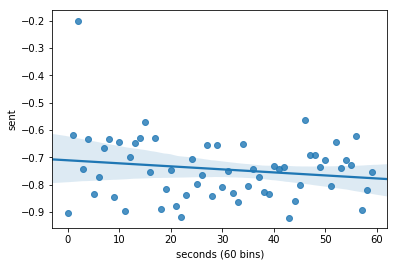

In [428]:
rubio = plot_person_sents('rubio')

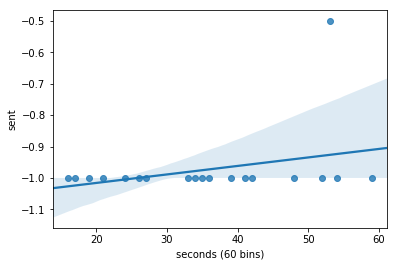

In [429]:
dana = plot_person_sents('dana')

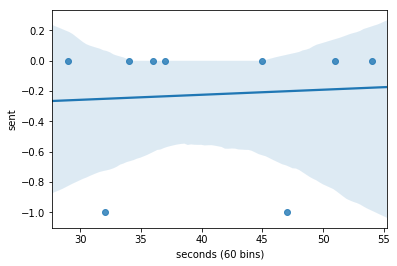

In [430]:
emma = plot_person_sents('emma')

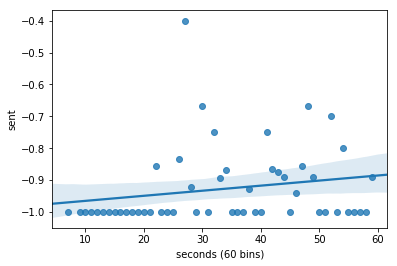

In [431]:
cameron = plot_person_sents('cameron')

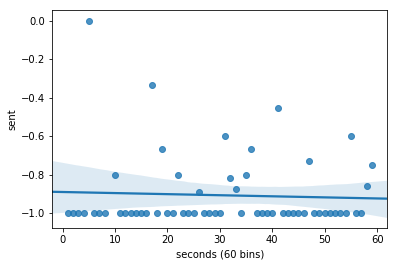

In [432]:
tapper = plot_person_sents('tapper')

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/bkvillalobos/anaconda3/envs/twitter_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


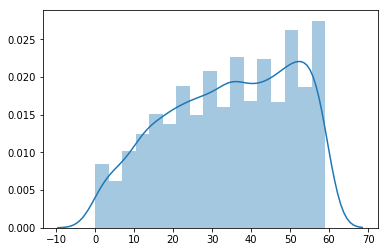

In [331]:
sns.distplot(minutes)

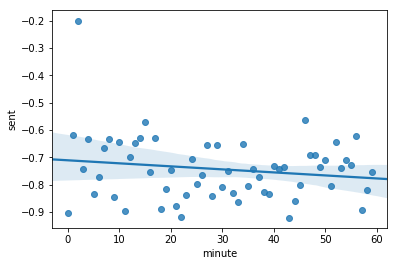

In [352]:
sns.regplot(avgd_df.minute, avgd_df.sent)

In [336]:
seconds.dim

AttributeError: 'tuple' object has no attribute 'dim'